In [215]:
%matplotlib inline

In [216]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json


# File to Load (Remember to change these)
ca_dmv_peak_hours = "2017_peak_hours_report_kdfactor.csv"

# Read the City and Ride Data
ca_dmv_peak_hours = pd.read_csv(ca_dmv_peak_hours)

In [217]:
url = "https://samples.openweathermap.org/storage/history_bulk.json?appid=f71cb5ce9a223b94d2b158d3bd8c2532"

In [218]:
print(requests.get(url).json())

[{'city_id': 5128581, 'main': {'temp': 271.9, 'temp_min': 270.15, 'temp_max': 274.15, 'pressure': 1010, 'humidity': 86}, 'wind': {'speed': 2.1, 'deg': 30}, 'clouds': {'all': 90}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}, {'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'dt': 1485907200, 'dt_iso': '2017-02-01 00:00:00 +0000 UTC'}, {'city_id': 5128581, 'main': {'temp': 271.9, 'temp_min': 270.15, 'temp_max': 274.15, 'pressure': 1011, 'humidity': 92}, 'wind': {'speed': 2.51, 'deg': 42.5083}, 'clouds': {'all': 90}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}, {'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'dt': 1485910800, 'dt_iso': '2017-02-01 01:00:00 +0000 UTC'}, {'city_id': 5128581, 'main': {'temp': 271.57, 'temp_min': 270.15, 'temp_max': 274.15, 'pressure': 1011, 'humidity': 92}, 'wind': {'speed': 1.01, 'deg': 110.5}, 'clouds': {'all': 40}, 'weather': [{'id': 701, 

In [219]:
from datetime import datetime

response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))
city_id_to_county_name = {5392423: "SF", 5368361: "LA"}
weather_data = Pandas.create()
d = {'county_name': [], "date_value": []}
weather_data = pd.DataFrame(data=d)
index = 0
for weather_data_point in response:
    county_name = city_id_to_county_name[weather_data_point["city_id"]]
    date_value = datetime.datetime.fromtimestamp(weather_data_point["dt"])
    # convert Kelvin to F
    temp_max = weather_data_point["main"]["temp_max"]
    temp_min = weather_data_point["main"]["temp_min"]
    weather_description = weather_data_point["weather"][0]["description"]
    weather_data.loc[index] = {'county_name': county_name, "date_value": date_value}  # add more fields
    index += 1

[
    {
        "city_id": 5128581,
        "clouds": {
            "all": 90
        },
        "dt": 1485907200,
        "dt_iso": "2017-02-01 00:00:00 +0000 UTC",
        "main": {
            "humidity": 86,
            "pressure": 1010,
            "temp": 271.9,
            "temp_max": 274.15,
            "temp_min": 270.15
        },
        "weather": [
            {
                "description": "mist",
                "icon": "50n",
                "id": 701,
                "main": "Mist"
            },
            {
                "description": "light snow",
                "icon": "13n",
                "id": 600,
                "main": "Snow"
            }
        ],
        "wind": {
            "deg": 30,
            "speed": 2.1
        }
    },
    {
        "city_id": 5128581,
        "clouds": {
            "all": 90
        },
        "dt": 1485910800,
        "dt_iso": "2017-02-01 01:00:00 +0000 UTC",
        "main": {
            "humidity": 92,
            "

NameError: name 'Pandas' is not defined

In [220]:
# Create dataframe for traffic data
# Display the data table for preview
ca_dmv_peak_hours.head()

,DI,RTE,CO,PRE,PM,CS,LEG,YR,AM_DIR,AM_WAY_PHV,...,AM_DAY,AM_MONTH,PM_DIR,PM_WAY_PHV,PM_K_FACTOR_AMT,PM_D_FACTOR_AMT,PM_KD_FACTOR,PM_HOUR,PM_DAY,PM_MONTH
0,12,1,ORA,NaN,22.500,623.0,O,17,S,2536,...,WED,NOV,N,2596,8.92,78.86,7.03,18,WED,FEB
1,12,1,ORA,NaN,30.141,937.0,A,16,N,14488,...,FRI,JUN,S,3012,7.82,75.49,5.90,19,WED,OCT
2,7,1,LA,NaN,18.090,7.0,A,15,N,1143,...,THU,OCT,S,1321,8.02,56.31,4.52,17,TUE,NOV
3,7,1,LA,NaN,27.100,425.0,O,17,N,4363,...,TUE,OCT,N,3980,7.66,62.80,4.81,17,TUE,JUN
4,7,1,LA,NaN,40.769,720.0,A,16,N,2106,...,MON,FEB,N,2742,9.64,58.20,5.61,17,TUE,JAN


In [221]:
# Collect a list of traffic locations in CA
columns = [
    "DI",  # Caltrans has twelve transportation districts statewide. This abbreviation identifies the district in which the count station is located. 
    "RTE", # The state highway route number. 
    "CO", # County abbreviation used by Caltrans
    "PRE", # The postmile may have a prefix like R, T, L, M, etc. When a length of highway is changed due to construction or realigment, new postmile values are assigned. To distinguish the new values from the old, an alpha code is prefixed to the new postmile. '''
    "PM", # The Post Mile is the mileage measured from the county line, or from the beginning of a route. Each postmile along a route in a county is a unique location on the state highway system. 
    "CS", # Control Station Number, Caltrans identification number for monitoring site. 
    "LEG", # For traffic counting purposes, a highway intersection or interchange is assigned two legs according to increasing postmiles (route direction) and with a postmile reference at the center of the intersection or interchange. 
    #  The volume of traffic on each leg is denoted by an A, B or O. 
    #  A = ahead leg, B = back leg, and O – traffic volume being same for both back and ahead legs.    
    "YR", # The year when the count was made. Traffic counting is on a 3-year cycle.
    "AM_DIR",   # Indicates direction of travel for peak volume.
    "AM_WAY_PHV",  # Peak Hour Volume in the peak direction. A one way volume in vehicles per hour (vph) as used here. The PHV is analogous to the DDHV as used for design purposes
    "AM_K_FACTOR_AMT", # The percentage of the AADT in both directions during the peak hour. Values in this table are derived by dividing the measured 2-way PHV by the AADT.
    "AM_D_FACTOR_AMT", #  D factor. The percentage of traffic in the peak direction during the peak hour.  Values in this book are derived by dividing the measured PHV by the sum of both directions of travel during the peak hour.
    "AM_KD_FACTOR",   #  The product of K and D. The percentage of AADT in the peak direction during the peak hour. Values in this table are derived by dividing the measured 1-way PHV by the AADT. 
    "AM_HOUR", 
    "AM_DAY",
    "AM_MONTH",
    "PM_DIR", 
    "PM_WAY_PHV",
    "PM_K_FACTOR_AMT",
    "PM_D_FACTOR_AMT",
    "PM_KD_FACTOR",
    "PM_HOUR",
    "PM_DAY",
    "PM_MONTH"
]

In [222]:
# what is the shape of traffic data?
ca_dmv_peak_hours.shape

(1412, 24)

In [223]:
# show summary statistic of traffic data
ca_dmv_peak_hours.describe

<bound method NDFrame.describe of       DI  RTE   CO  PRE      PM     CS LEG  YR AM_DIR  AM_WAY_PHV  ...  \
0     12    1  ORA  NaN  22.500  623.0   O  17      S        2536  ...   
1     12    1  ORA  NaN  30.141  937.0   A  16      N       14488  ...   
2      7    1   LA  NaN  18.090    7.0   A  15      N        1143  ...   
3      7    1   LA  NaN  27.100  425.0   O  17      N        4363  ...   
4      7    1   LA  NaN  40.769  720.0   A  16      N        2106  ...   
5      7    1   LA  NaN  48.171   45.0   A  16      N        1440  ...   
6      5    1   SB    R   0.000  517.0   A  17      S         752  ...   
7      5    1   SB  NaN  19.251  296.0   B  16      S         886  ...   
8      5    1   SB  NaN  20.565  518.0   A  17      S         528  ...   
9      5    1   SB  NaN  22.519  294.0   O  17      N        1332  ...   
10     5    1   SB    R  23.296  286.0   A  17      N        1117  ...   
11     5    1   SB    R  26.690  288.0   A  17      N        1112  ...   
12  

In [224]:
# Check to see if there are any rows with missing data
ca_dmv_peak_hours.count()  # PRE is only 449 records when construction changes post miles
# We have 1412 rows of data from 2015 to 2017 and 24 columns

DI                 1412
RTE                1412
CO                 1412
PRE                 449
PM                 1412
CS                 1411
LEG                1412
YR                 1412
AM_DIR             1412
AM_WAY_PHV         1412
AM_K_FACTOR_AMT    1412
AM_D_FACTOR_AMT    1412
AM_KD_FACTOR       1412
AM_HOUR            1412
AM_DAY             1412
AM_MONTH           1412
PM_DIR             1412
PM_WAY_PHV         1412
PM_K_FACTOR_AMT    1412
PM_D_FACTOR_AMT    1412
PM_KD_FACTOR       1412
PM_HOUR            1412
PM_DAY             1412
PM_MONTH           1412
dtype: int64

In [226]:
# Create a group based on the routes and mile post in California
ca_dmv_peak_hours_group = ca_dmv_peak_hours.groupby(['CO','RTE','PM'])

# look at count per location
print(f"ca_dmv_peak_hours_group.count={ca_dmv_peak_hours_group.count()}")

# o-Count how many times each location appears in our group

ca_dmv_peak_hours_group.count=                DI  PRE  CS  LEG  YR  AM_DIR  AM_WAY_PHV  AM_K_FACTOR_AMT  \
CO  RTE PM                                                                  
ALA 13  4.262    1    0   1    1   1       1           1                1   
        13.906   1    0   1    1   1       1           1                1   
    61  18.520   1    0   1    1   1       1           1                1   
    77  0.098    1    0   1    1   1       1           1                1   
    80  1.989    1    0   1    1   1       1           1                1   
    84  26.215   1    1   1    1   1       1           1                1   
    580 10.689   1    0   1    1   1       1           1                1   
        30.354   1    0   1    1   1       1           1                1   
    680 1.961    1    1   1    1   1       1           1                1   
        20.057   1    1   1    1   1       1           1                1   
ALP 89  23.972   1    0   1    1   1       1  

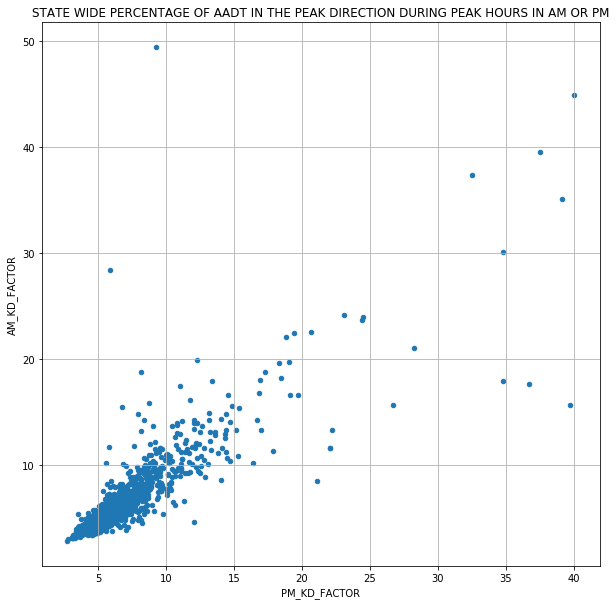

In [227]:
# Create a scatter plot which compares PM PHV  to AM PHV for all highways
ca_dmv_peak_hours.plot(kind="scatter", x="PM_KD_FACTOR", y="AM_KD_FACTOR", grid=True, figsize=(10,10),
              title="STATE WIDE PERCENTAGE OF AADT IN THE PEAK DIRECTION DURING PEAK HOURS IN AM OR PM")
plt.show()
# Plot indicates 2% to 20% OF daily traffic occurs in peak morning hour
# 3% to 15% of daily traffic occurs in peak evening hour.

In [228]:
ca_dmv_peak_hours.columns  #Show column names

Index(['DI', 'RTE', 'CO', 'PRE', 'PM', 'CS', 'LEG', 'YR', 'AM_DIR',
       'AM_WAY_PHV', 'AM_K_FACTOR_AMT', 'AM_D_FACTOR_AMT', 'AM_KD_FACTOR',
       'AM_HOUR', 'AM_DAY', 'AM_MONTH', 'PM_DIR', 'PM_WAY_PHV',
       'PM_K_FACTOR_AMT', 'PM_D_FACTOR_AMT', 'PM_KD_FACTOR', 'PM_HOUR',
       'PM_DAY', 'PM_MONTH'],
      dtype='object')

In [229]:
# Clean Data & Drop all rows with missing information
df = ca_dmv_peak_hours.dropna(how='any')

In [230]:
# Check for missing Rows
df.count()

DI                 449
RTE                449
CO                 449
PRE                449
PM                 449
CS                 449
LEG                449
YR                 449
AM_DIR             449
AM_WAY_PHV         449
AM_K_FACTOR_AMT    449
AM_D_FACTOR_AMT    449
AM_KD_FACTOR       449
AM_HOUR            449
AM_DAY             449
AM_MONTH           449
PM_DIR             449
PM_WAY_PHV         449
PM_K_FACTOR_AMT    449
PM_D_FACTOR_AMT    449
PM_KD_FACTOR       449
PM_HOUR            449
PM_DAY             449
PM_MONTH           449
dtype: int64

In [231]:
# ATTENTION : Below you will see Counties Data Summaries with formulas finding the sum , avg , max , min values of specific columns
# Some have been identified in Alphabetical formats to avoid confusion \
# summarized CC, UL calcs into dataframe and line graph and pie graph

In [232]:
County_sum = (ca_dmv_peak_hours.groupby("CO")["AM_WAY_PHV"].count())
AM_avg = (ca_dmv_peak_hours.groupby("CO")["AM_WAY_PHV"].mean().round(2))
PM_avg = (ca_dmv_peak_hours.groupby("CO")["PM_WAY_PHV"].mean().round(2))
AM_max = (ca_dmv_peak_hours.groupby("CO")["AM_WAY_PHV"].max())
PM_max = (ca_dmv_peak_hours.groupby("CO")["PM_WAY_PHV"].max())
AM_min = (ca_dmv_peak_hours.groupby("CO")["AM_WAY_PHV"].min())
PM_min = (ca_dmv_peak_hours.groupby("CO")["PM_WAY_PHV"].min())

#create summary 
ca_df = pd.DataFrame({'AM avg PHV': AM_avg, 'PM avg PHV': PM_avg, 'AM max PHV': AM_max, 'PM max PHV': PM_max, 'AM min PHV': AM_min, 'PM min PHV': PM_min })
ca_df

,AM avg PHV,PM avg PHV,AM max PHV,PM max PHV,AM min PHV,PM min PHV
CO,,,,,,
ALA,4914.70,4997.30,9749,10713,939,852
ALP,372.00,706.00,372,706,372,706
AMA,536.75,660.00,703,818,408,566
BUT,878.08,935.88,3778,4259,81,93
CAL,329.00,313.33,489,431,94,90
CC,5391.31,5470.38,9880,10782,772,502
COL,577.20,663.80,1852,2061,45,51
DN,367.00,397.67,591,634,208,221
ED,1064.67,1114.17,3259,3521,235,250


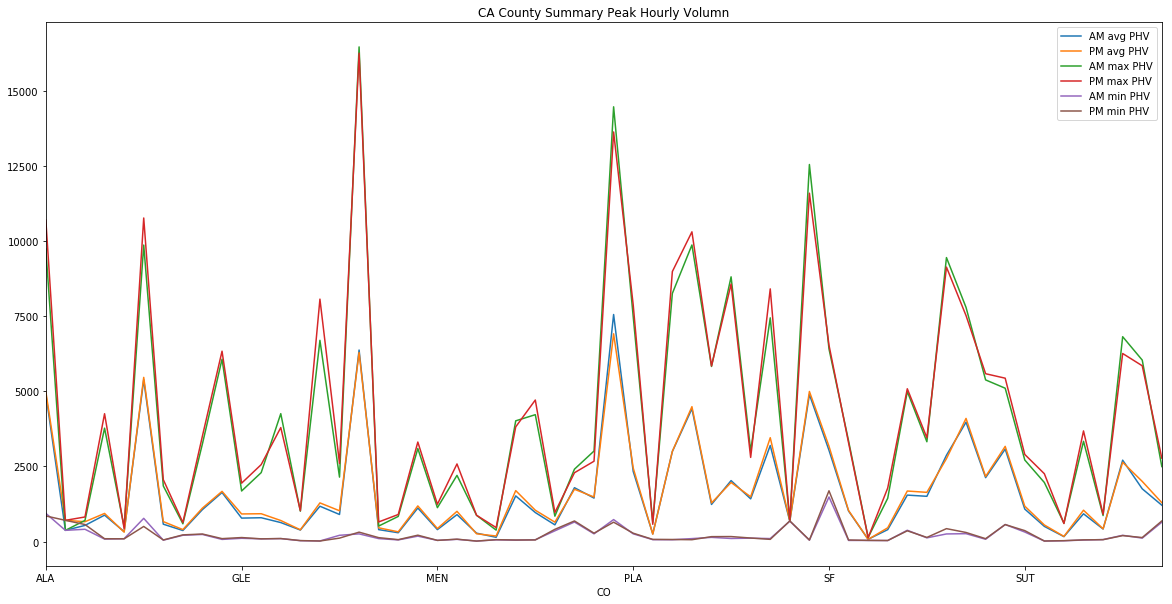

<Figure size 432x288 with 0 Axes>

In [233]:
# Plot Data 
ca_df.plot(kind="line", figsize=(20,10))

# Set a title for the chart
plt.title("CA County Summary Peak Hourly Volumn")

#Add the legend.
legend = plt.legend(loc = "best")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

plt.show()
plt.tight_layout()

In [234]:
# Create a new DataFrame that looks into SF county
Sf_df = ca_dmv_peak_hours.loc[ca_dmv_peak_hours["CO"] == "SF"]
Sf_df

,DI,RTE,CO,PRE,PM,CS,LEG,YR,AM_DIR,AM_WAY_PHV,...,AM_DAY,AM_MONTH,PM_DIR,PM_WAY_PHV,PM_K_FACTOR_AMT,PM_D_FACTOR_AMT,PM_KD_FACTOR,PM_HOUR,PM_DAY,PM_MONTH
32,4,1,SF,NaN,4.050,103.0,B,16,N,2535,...,SAT,OCT,S,2505,6.70,52.55,3.52,16,TUE,JAN
868,4,101,SF,NaN,5.322,110.0,B,16,S,1725,...,THU,NOV,N,1691,6.21,59.40,3.69,17,THU,AUG
869,4,101,SF,NaN,5.940,111.0,A,16,N,1484,...,FRI,MAY,N,1963,6.68,68.07,4.55,17,FRI,MAY
1301,4,280,SF,R,0.000,112.0,A,17,N,6420,...,THU,OCT,S,6544,8.68,53.51,4.64,15,FRI,OCT


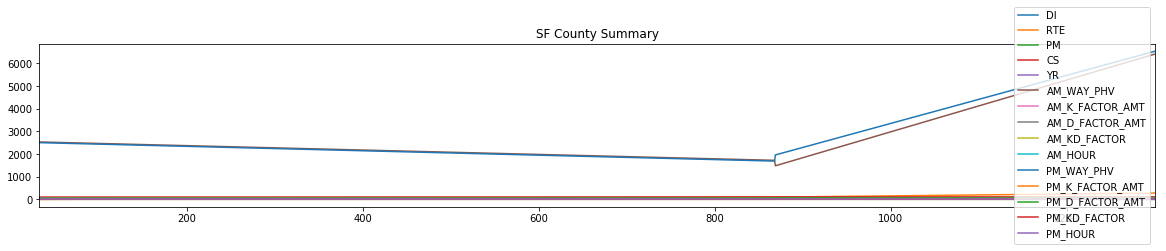

<Figure size 432x288 with 0 Axes>

In [235]:
# Plot Data 
Sf_df.plot(kind="line", figsize=(20,3))

# Set a title for the chart
plt.title("SF County Summary")

#Add the legend.
legend = plt.legend(loc = "right")

legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

plt.show()
plt.tight_layout()

In [ ]:
# SF DAY (AM_SUMMARIES)
#print AM_K_FACTOR_AMT
a = (round(Sf_df["AM_WAY_PHV"].sum()))
a

In [ ]:
#print AM_D_FACTOR_AMT (AM_SUMMARIES)
b = (round(Sf_df["AM_K_FACTOR_AMT"].sum()))
b

In [ ]:
#print AM_KD_FACTOR (AM_SUMMARIES)
c = (round(Sf_df["AM_D_FACTOR_AMT"].sum()))
c

In [ ]:
# (AM_SUMMARIES)
d = (Sf_df.set_index('CO')['RTE'].value_counts())
d

In [ ]:
# Calculate for Busiest SF AM Routes
Sf_Peak_AM = Sf_df.groupby(["RTE"])["AM_WAY_PHV"].sum()

Sf_Peak_AM

In [ ]:
#Use the city_fare index for wedge labels.
#SF_type.index

In [ ]:
Sf_Peak_AM.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Busiest AM Route in SF County")

#Add the legend.
legend = plt.legend(loc = "upper left")


plt.show()
plt.tight_layout()

In [ ]:
# SF Evening (PM_SUMMARY)
#print PM_K_FACTOR_AMT
e =(Sf_df["PM_WAY_PHV"].sum())
e

In [ ]:
#print AM_D_FACTOR_AMT
f = (Sf_df["PM_K_FACTOR_AMT"].sum())
f

In [ ]:
#print AM_KD_FACTOR
g = (round(Sf_df["PM_D_FACTOR_AMT"].sum()))
g

In [ ]:
h = (Sf_df.set_index('CO')['RTE']).value_counts()

h

In [ ]:
# Calculate for Busiest SF PM Routes
Sf_Peak_PM = Sf_df.groupby(["RTE"])["PM_WAY_PHV"].max()
Sf_Peak_PM.head()

In [ ]:
#Use the city_fare index for wedge labels.
# SF_type.index

In [ ]:
Sf_Peak_PM.plot(kind="bar", figsize=(20,3))
plt.hlines

# Set a title for the chart
plt.title("Busiest PM Route in SF County")

#Add the legend.
legend = plt.legend(loc = "upper left")

plt.show()
plt.tight_layout()